#NO need to MOVEIT; however its advisable to move the neck 
#OSCII CODED

## Setup

必要なライブラリをインポートして、初期化を行います。

Import the required libraries and initialize them:

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ros_numpy
import rospy
import tf
from gazebo_ros import gazebo_interface
from sensor_msgs.msg import LaserScan, PointCloud2
from geometry_msgs.msg import Pose, Quaternion
import sys
import time

from utils_notebooks import *
import cv2
import os




In [99]:
import moveit_commander
import moveit_msgs.msg
head = moveit_commander.MoveGroupCommander('head')

In [100]:


## THIS PATH MUST BE SET BY USER () 


#_path_model = "/home/oscar/Codes/ycb_ws/src/robot_object_views/robotobject/models"   Tenshi Version

#_path_model = "/home/oscar/Codes/catkin_mio_ws/src/tmc_wrs_gazebo_world/models"     #Catkin mio version 
_path_model = "/home/roboworks/Codes/catkin_mio/src/tmc_wrs_gazebo_world/models"     #Catkin mio version 


objs=os.listdir(_path_model)
print (objs)

['ycb_012_strawberry', 'ycb_035_power_drill', 'wrc_ground_plane', 'ycb_072-a_toy_airplane', 'ycb_033_spatula', 'ycb_032_knife', 'ycb_065-a_cups', 'ycb_016_pear', 'ycb_073-e_lego_duplo', 'trofast', 'wrc_bookshelf', 'ycb_003_cracker_box', 'ycb_021_bleach_cleanser', 'ycb_077_rubiks_cube', 'wrc_long_table', 'ycb_059_chain', 'ycb_063-a_marbles', 'ycb_038_padlock', 'ycb_053_mini_soccer_ball', 'ycb_024_bowl', 'ycb_057_racquetball', 'wrc_container_b', 'ycb_065-c_cups', 'ycb_055_baseball', 'ycb_017_orange', 'ycb_072-e_toy_airplane', 'ycb_013_apple', 'wrc_bin_green', 'wrc_stair_like_drawer', 'wrc_frame', 'ycb_018_plum', 'ycb_009_gelatin_box', 'ycb_065-h_cups', 'ycb_014_lemon', 'ycb_004_sugar_box', 'ycb_065-f_cups', 'ycb_065-i_cups', 'ycb_044_flat_screwdriver', 'ycb_040_large_marker', 'ycb_005_tomato_soup_can', 'ycb_065-e_cups', 'ycb_062_dice', 'ycb_042_adjustable_wrench', 'ycb_010_potted_meat_can', 'ycb_030_fork', 'ycb_019_pitcher_base', 'ycb_002_master_chef_can', 'ycb_028_skillet_lid', 'ycb_054

In [101]:
#AGAIN THIS PATH MUST BE SET ( IT IS LOCATED IN NOTEBOOK UTILS FILE utils_notebooks.py)

rvizを起動します．ロボットモデル、カメラ映像、ポイントクラウドが表示されています。

In [6]:
#Initialize  Ros Node
rospy.init_node("recognition")


In [7]:
#create a RGBD() object to read xtion
rgbd = RGBD()

In [8]:
#Create a tf listener to read tf tree ( shockingly)
listener = tf.TransformListener()
rospy.sleep(.5)

Launch RViz. The robot model, camera image, and point cloud are displayed:

In [83]:
def gazebo_2_world(x,y):

    x_world= x+2.1
    y_world= -(y-1.2)
    return (x_world,y_world)

def world_2_gazebo(y_world , x_world):

    x= ( x_world - 2.1)
    y= (-y_world + 1.2) 
    return (x , y)

In [80]:
#Get pose of the xtion w.r.t map frame 
#( odom , or hsrb base vfootprint might obe other 
#useful reference frames)


trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_gazebo_frame', rospy.Time(0))
#trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_link', rospy.Time(0))
euler=tf.transformations.euler_from_quaternion(rot)

trans, euler

([1.7687094855661183, -0.14661447304423525, 0.9516806577744652],
 (-4.8965328492855534e-12, -0.350570750251757, -0.19433186134869937))

In [104]:
#moveit
#MOVE IT MUST BE RUNNING. DECLARE A HEAD POSE
head_val=head.get_current_joint_values()
head_val[0]=np.deg2rad(-80)
head_val[1]=np.deg2rad(20)
#WATCH OUT FOR JOINTS LIMITS (exorcist joke)

In [105]:
#plan and execute target pose
head.set_joint_value_target(head_val)
head.go()

True

In [136]:
#Get pose of the xtion w.r.t map frame 

trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_gazebo_frame', rospy.Time(0))
#trans , rot = listener.lookupTransform('/map', '/head_rgbd_sensor_link', rospy.Time(0))
euler=tf.transformations.euler_from_quaternion(rot)

trans, euler

([1.92113732574024, -0.06463229568999304, 0.9516651807298777],
 (-4.896433821350536e-12, -0.3506639801072016, -1.6019378996296039))

In [152]:
#USE TRANSFORM TREE TF TO SPAWN A STATIC MODEL
# D_to_cam  METERS AWAY FROM XTION ON THE dIRECTION OF IT FOCAL POINT


#x_gaz,y_gaz=world_2_gazebo(1.15,0.02)
deg=0

model_name= objs[-3]   #Rubik 

#spawn_object("lego1", model_name, x_gaz,  y_gaz, .11, 0)
D_to_cam= 0.5
x_gaz,y_gaz=world_2_gazebo(0.025+trans[0]+ D_to_cam * np.cos(euler[2]), 0.01+ trans[1]+ D_to_cam * np.sin(euler[2]))
spawn_object(model_name, model_name, x_gaz,  y_gaz, -.1+ trans[2]- D_to_cam*np.sin(euler[1]), deg,0,.5*np.pi*np.random.rand())


[INFO] [1616714224.323352, 1572.386000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616714224.329897, 1572.387000]: Spawn: [0.         0.29585738 0.         0.95523212]
[INFO] [1616714224.343102, 1572.390000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616714224.348884, 1572.391000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616714224.468921, 1572.400000]: Spawn status: SpawnModel: Successfully spawned entity


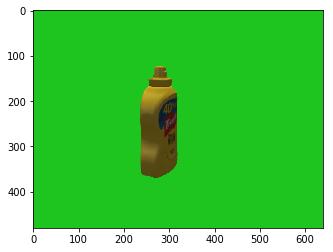

In [153]:
#GET AND SHOW IMAGE
cv2_img = rgbd.get_image()
plt.imshow(cv2_img)


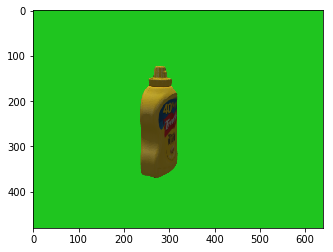

In [154]:
cv2_img = rgbd.get_image()
plt.imshow(cv2_img)


In [158]:
delete_object(model_name)


レゴブロックが頭部カメラの画角に入るように頭を少し下げます。rviz上の頭部カメラの映像が変化することを確認しましょう。

Lower the head slightly so that the Lego block is within the viewing angle of the head camera. Check that the image in the head camera in RViz changes accordingly:

In [159]:
#Capture a frame each degdree while changing static object pose
#I dont love this way of spawining and  deleting, 
#CONTROL VIA ROS TOPIC POSE !
start = time.time()


for i in range (256):


    deg= np.deg2rad(i)
    print(i)
    #spawn_object("lego2", model_name, x_gaz,  y_gaz, trans[2], 0.8)
    #spawn_object(model_name, model_name, x_gaz,  y_gaz, trans[2]- D_to_cam* np.sin(euler[1]) , 2*np.pi*np.random.rand() ,2*np.pi*np.random.rand(),2*np.pi*np.random.rand())
    spawn_object(model_name, model_name, x_gaz,  y_gaz, -.1+trans[2]- D_to_cam* np.sin(euler[1]) , 2*np.pi*np.random.rand(),0,.5*np.pi*np.random.rand()             )
    cap_cnt= i
    rospy.sleep(.1)
    cv2_img = rgbd.get_image()

    cap_name = "/home/roboworks/Desktop/imagesfromlistener/"+model_name+"_{}.png".format(cap_cnt)   ##SAVE YOUR IMAGES WHEREVER YOU WAnt
    #cap_name = "imagesfromlistener/image_from_listener_{}.png".format(cap_cnt)
    im_rgb = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(cap_name, im_rgb)
    delete_object(model_name)
end = time.time()


    

0
[INFO] [1616715286.957322, 1719.060000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715286.960642, 1719.060000]: Spawn: [-0.65832306 -0.12719461  0.72843944 -0.1407418 ]
[INFO] [1616715286.962792, 1719.061000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715286.970818, 1719.062000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715287.065141, 1719.066000]: Spawn status: SpawnModel: Successfully spawned entity
1
[INFO] [1616715288.866914, 1719.303000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715288.869912, 1719.303000]: Spawn: [-0.62771761 -0.12584043  0.75321575 -0.15099942]
[INFO] [1616715288.872106, 1719.303000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715288.884863, 1719.303000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715289.143290, 1719.332000]: Spawn status: SpawnModel: Successfully spawned entity
2
[INFO] [1616715291.149855, 1719.594000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715291.153262, 1719.594000]: Spawn: [-0.17097876  0

19
[INFO] [1616715327.718406, 1724.414000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715327.721308, 1724.416000]: Spawn: [-0.46908283 -0.13306431  0.83993215 -0.2382628 ]
[INFO] [1616715327.723317, 1724.416000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715327.734512, 1724.419000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715327.993644, 1724.446000]: Spawn status: SpawnModel: Successfully spawned entity
20
[INFO] [1616715330.039032, 1724.736000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715330.041901, 1724.736000]: Spawn: [-0.16248113  0.10014268  0.83564761  0.51503824]
[INFO] [1616715330.043685, 1724.736000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715330.047801, 1724.736000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715330.329645, 1724.768000]: Spawn status: SpawnModel: Successfully spawned entity
21
[INFO] [1616715332.174961, 1725.021000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715332.177536, 1725.021000]: Spawn: [-0.00534153

38
[INFO] [1616715368.654929, 1729.796000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715368.660488, 1729.797000]: Spawn: [-0.39770699  0.27562149  0.71928743  0.49848525]
[INFO] [1616715368.661996, 1729.797000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715368.675501, 1729.798000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715368.903770, 1729.812000]: Spawn status: SpawnModel: Successfully spawned entity
39
[INFO] [1616715370.744591, 1730.055000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715370.747255, 1730.055000]: Spawn: [-0.23051112 -0.41536253  0.4270008  -0.76942115]
[INFO] [1616715370.751247, 1730.056000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715370.754815, 1730.056000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715371.015029, 1730.078000]: Spawn status: SpawnModel: Successfully spawned entity
40
[INFO] [1616715373.126865, 1730.348000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715373.129545, 1730.348000]: Spawn: [-0.28900049

57
[INFO] [1616715410.846563, 1735.149000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715410.849360, 1735.149000]: Spawn: [-0.00432785 -0.02222915  0.19105537 -0.98131798]
[INFO] [1616715410.851427, 1735.149000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715410.867247, 1735.152000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715411.112673, 1735.186000]: Spawn status: SpawnModel: Successfully spawned entity
58
[INFO] [1616715413.133909, 1735.439000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715413.137738, 1735.440000]: Spawn: [-0.61532412 -0.26378364  0.68273782 -0.29268326]
[INFO] [1616715413.139390, 1735.440000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715413.155983, 1735.442000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715413.405020, 1735.473000]: Spawn status: SpawnModel: Successfully spawned entity
59
[INFO] [1616715415.428950, 1735.736000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715415.433160, 1735.736000]: Spawn: [-0.14530569

76
[INFO] [1616715453.951079, 1740.627000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715453.954422, 1740.628000]: Spawn: [-0.08713526  0.12703886  0.55887758  0.81481558]
[INFO] [1616715453.955962, 1740.628000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715453.970466, 1740.630000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715454.175506, 1740.656000]: Spawn status: SpawnModel: Successfully spawned entity
77
[INFO] [1616715456.168989, 1740.913000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715456.172655, 1740.913000]: Spawn: [-0.31222532 -0.13066031  0.86803674 -0.36325673]
[INFO] [1616715456.176925, 1740.913000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715456.180283, 1740.913000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715456.263106, 1740.921000]: Spawn status: SpawnModel: Successfully spawned entity
78
[INFO] [1616715458.280176, 1741.175000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715458.283445, 1741.176000]: Spawn: [-0.02254699

95
[INFO] [1616715495.717558, 1745.903000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715495.720917, 1745.904000]: Spawn: [-0.22789325  0.35559074  0.48909557  0.76315491]
[INFO] [1616715495.723257, 1745.904000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715495.739816, 1745.904000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715495.816157, 1745.906000]: Spawn status: SpawnModel: Successfully spawned entity
96
[INFO] [1616715497.845728, 1746.168000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715497.848156, 1746.168000]: Spawn: [-0.20478557 -0.3070312   0.51571247 -0.77319814]
[INFO] [1616715497.849747, 1746.168000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715497.856873, 1746.168000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715497.962216, 1746.174000]: Spawn status: SpawnModel: Successfully spawned entity
97
[INFO] [1616715500.105851, 1746.460000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715500.110178, 1746.461000]: Spawn: [-0.24644334

114
[INFO] [1616715537.812096, 1751.182000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715537.815112, 1751.183000]: Spawn: [-0.04292798 -0.70482971  0.04304596 -0.70676681]
[INFO] [1616715537.817569, 1751.184000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715537.822527, 1751.184000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715538.079312, 1751.210000]: Spawn status: SpawnModel: Successfully spawned entity
115
[INFO] [1616715540.103713, 1751.469000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715540.107725, 1751.470000]: Spawn: [-0.4734922   0.04434393  0.87584846  0.08202577]
[INFO] [1616715540.109272, 1751.470000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715540.113747, 1751.470000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715540.401610, 1751.503000]: Spawn status: SpawnModel: Successfully spawned entity
116
[INFO] [1616715542.454570, 1751.767000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715542.457405, 1751.767000]: Spawn: [-0.33478

133
[INFO] [1616715580.967657, 1756.636000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715580.970570, 1756.636000]: Spawn: [-0.36967077 -0.10640665  0.88703441 -0.25532547]
[INFO] [1616715580.972273, 1756.636000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715580.974859, 1756.636000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715581.077162, 1756.642000]: Spawn status: SpawnModel: Successfully spawned entity
134
[INFO] [1616715583.110842, 1756.901000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715583.113283, 1756.901000]: Spawn: [-0.29545767  0.22699747  0.73588612  0.56537469]
[INFO] [1616715583.114721, 1756.901000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715583.117746, 1756.901000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715583.180085, 1756.901000]: Spawn status: SpawnModel: Successfully spawned entity
135
[INFO] [1616715585.698506, 1757.242000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715585.703654, 1757.243000]: Spawn: [-0.02114

152
[INFO] [1616715623.764560, 1761.968000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715623.767054, 1761.968000]: Spawn: [-0.42635222  0.50139174  0.48771471  0.57355425]
[INFO] [1616715623.768645, 1761.968000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715623.772066, 1761.968000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715623.983699, 1761.992000]: Spawn status: SpawnModel: Successfully spawned entity
153
[INFO] [1616715626.054833, 1762.258000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715626.057376, 1762.258000]: Spawn: [-0.27867531  0.10002064  0.8990112   0.32266825]
[INFO] [1616715626.059523, 1762.258000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715626.068765, 1762.260000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715626.324269, 1762.290000]: Spawn status: SpawnModel: Successfully spawned entity
154
[INFO] [1616715628.373845, 1762.557000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715628.376974, 1762.557000]: Spawn: [-0.11462

171
[INFO] [1616715666.247477, 1767.302000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715666.250482, 1767.302000]: Spawn: [-0.63042586 -0.14979676  0.74102704 -0.17607693]
[INFO] [1616715666.253046, 1767.302000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715666.269499, 1767.304000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715666.524293, 1767.332000]: Spawn status: SpawnModel: Successfully spawned entity
172
[INFO] [1616715668.845980, 1767.637000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715668.848604, 1767.637000]: Spawn: [-0.03791321  0.08518464  0.40484501  0.90961898]
[INFO] [1616715668.850468, 1767.637000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715668.864642, 1767.638000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715669.120247, 1767.671000]: Spawn status: SpawnModel: Successfully spawned entity
173
[INFO] [1616715671.146190, 1767.928000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715671.149305, 1767.928000]: Spawn: [-0.62512

190
[INFO] [1616715709.334326, 1772.772000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715709.338443, 1772.773000]: Spawn: [-0.55627143  0.35619685  0.63227457  0.40486388]
[INFO] [1616715709.341925, 1772.773000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715709.353094, 1772.775000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715709.636065, 1772.801000]: Spawn status: SpawnModel: Successfully spawned entity
191
[INFO] [1616715711.629110, 1773.060000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715711.631876, 1773.060000]: Spawn: [-0.26251516 -0.20002247  0.75084754 -0.57210556]
[INFO] [1616715711.634370, 1773.060000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715711.644610, 1773.062000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715711.946301, 1773.082000]: Spawn status: SpawnModel: Successfully spawned entity
192
[INFO] [1616715713.976330, 1773.333000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715713.979132, 1773.334000]: Spawn: [-0.15331

209
[INFO] [1616715750.894431, 1777.904000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715750.897495, 1777.904000]: Spawn: [-0.54378142  0.20062336  0.76452099  0.28206327]
[INFO] [1616715750.901352, 1777.905000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715750.910135, 1777.906000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715751.129864, 1777.931000]: Spawn status: SpawnModel: Successfully spawned entity
210
[INFO] [1616715752.961178, 1778.165000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715752.964710, 1778.166000]: Spawn: [-0.13740397 -0.25718695  0.4507447  -0.84368492]
[INFO] [1616715752.967072, 1778.166000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715752.971352, 1778.167000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715753.043560, 1778.168000]: Spawn status: SpawnModel: Successfully spawned entity
211
[INFO] [1616715755.095885, 1778.433000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715755.099398, 1778.433000]: Spawn: [-0.25040

228
[INFO] [1616715793.662682, 1783.225000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715793.665472, 1783.226000]: Spawn: [-0.34055064 -0.41997545  0.52982822 -0.65339723]
[INFO] [1616715793.667584, 1783.226000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715793.678617, 1783.228000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715793.940204, 1783.258000]: Spawn status: SpawnModel: Successfully spawned entity
229
[INFO] [1616715795.991848, 1783.521000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715795.996021, 1783.522000]: Spawn: [-0.19329115 -0.04171774  0.95819095 -0.20680492]
[INFO] [1616715795.998228, 1783.522000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715796.016690, 1783.524000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715796.292017, 1783.549000]: Spawn status: SpawnModel: Successfully spawned entity
230
[INFO] [1616715798.301964, 1783.801000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715798.305352, 1783.801000]: Spawn: [-0.47480

247
[INFO] [1616715836.072607, 1788.505000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715836.076188, 1788.506000]: Spawn: [-0.04499761  0.08589563  0.46185787  0.88163737]
[INFO] [1616715836.078133, 1788.506000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715836.088821, 1788.507000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715836.342072, 1788.537000]: Spawn status: SpawnModel: Successfully spawned entity
248
[INFO] [1616715838.341803, 1788.791000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715838.344546, 1788.791000]: Spawn: [-0.18784252 -0.32751515  0.46069442 -0.80324944]
[INFO] [1616715838.346456, 1788.792000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616715838.357678, 1788.793000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616715838.434554, 1788.796000]: Spawn status: SpawnModel: Successfully spawned entity
249
[INFO] [1616715840.578320, 1789.058000]: Spawn: ycb_006_mustard_bottle
[INFO] [1616715840.581630, 1789.058000]: Spawn: [-0.08790

In [160]:
print( 'time elapsed in training video',(end - start)/60,'mins')

('time elapsed in training video', 9.47558351357778, 'mins')


#TO MAKE MR EDD HAPPY MAKE A VIDEO OUT OF THIS FRAMES
#on terminal go to folder containing the images and run
# $ffmpeg -framerate 30  -pattern_type glob -i '*.png' -r 5 video.mp4
# It is advisable to name each video other than video.mp4

In [41]:
x_gaz,y_gaz=2.66,-1.0

spawn_object("lego1", model_name, x_gaz,  y_gaz, 0.81, 0)
spawn_object("lego2", model_name, x_gaz,  y_gaz+.20, 0.81, 0)


[INFO] [1616171839.121837, 619.732000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616171839.129753, 619.735000]: Spawn: [0. 0. 0. 1.]
[INFO] [1616171839.133454, 619.735000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616171839.152859, 619.738000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616171839.400309, 619.757000]: Spawn status: SpawnModel: Successfully spawned entity
[INFO] [1616171839.402064, 619.757000]: Spawn: ycb_077_rubiks_cube
[INFO] [1616171839.404728, 619.757000]: Spawn: [0. 0. 0. 1.]
[INFO] [1616171839.406307, 619.757000]: Waiting for service /gazebo/spawn_sdf_model
[INFO] [1616171839.423869, 619.758000]: Calling service /gazebo/spawn_sdf_model
[INFO] [1616171839.666958, 619.777000]: Spawn status: SpawnModel: Successfully spawned entity


In [ ]:
delete_object("lego1")
delete_object("lego2")
delete_object("lego3")

In [25]:
low= np.array([0,100,0])
high= np.array([100,200,100])
mask = cv2.inRange(cv2_img, low, high)
mask_buena= cv2.morphologyEx(mask,cv2.MORPH_ERODE,np.ones((9,9),np.uint8))
masked_image = np.copy(img)
masked_image[mask_buena != 0] = [0, 0, 0]

#
### FIND OBJECTS ( CONTOURS FINDING IN MASKED IMAGE)

ret,thresh = cv2.threshold(mask_buena,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
i=find_2nd_biggest_contour_ix(contours)
boundRect = cv2.boundingRect(contours[find_2nd_biggest_contour_ix(contours)])#contours_poly[i])
cv2.rectangle(img,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), color, 2)
x,y,w,h =boundRect
print (w,h)
if (w < h):


    x=(int)(x-.5*(h-w))
    w=h
    boundRect=x,y,w,h
    cv2.rectangle(img,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), color2, 2)
if (h < w):


    y=(int)(x-.5*(w-h))
    h=w
    boundRect=x,y,w,h
    cv2.rectangle(img,(boundRect[0], boundRect[1]),(boundRect[0]+boundRect[2], boundRect[1]+boundRect[3]), color2, 2)

img_roi=img[y:y+h,x:x+w,:]
#img_resized=cv2.resize(img_roi,(img_width,img_height))



cv2.imshow('frame', img)
if cv2.waitKey(1) == ord('q'):
    break